In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00


# Load a dataset from the Hub

## dataset builder

In [5]:
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("rotten_tomatoes")

# Inspect dataset description
ds_builder.info.description

# Inspect dataset features
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [10]:
ds_builder.as_dataset()

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [12]:
from datasets import get_dataset_split_names

get_dataset_split_names("rotten_tomatoes")

['train', 'validation', 'test']

## split

In [21]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", split="train")
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

## config name

In [22]:
from datasets import get_dataset_config_names

configs = get_dataset_config_names("rotten_tomatoes")
print(configs)

['default']


In [40]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", "default", split="train")
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

## indexing

In [25]:
dataset[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Indexing by column

In [ ]:
dataset["text"]

In [27]:
import time

start_time = time.time()
text = dataset[0]["text"]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

start_time = time.time()
text = dataset["text"][0]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

Elapsed time: 0.0017 seconds
Elapsed time: 0.0294 seconds


## slicing

In [28]:
dataset[:3]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'effective but too-tepid biopic'],
 'label': [1, 1, 1]}

In [31]:
from datasets import load_dataset

iterable_dataset = load_dataset("rotten_tomatoes", split="train", streaming=True)
for example in iterable_dataset:
    print(example)
    break

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}


## To iterable

In [45]:
# read from load_dataset
iterable_dataset = load_dataset("rotten_tomatoes", split="train", streaming=True)
# dataset to iterable
iterable_dataset = dataset.to_iterable_dataset()

In [44]:
list(iterable_dataset.take(3))

[{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'label': 1},
 {'text': 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'label': 1},
 {'text': 'effective but too-tepid biopic', 'label': 1}]

# Preprocess

## Tokenize

In [46]:
from transformers import AutoTokenizer
from datasets import load_dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("rotten_tomatoes", split="train")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [47]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [48]:
def tokenization(example):
    return tokenizer(example["text"])

dataset = dataset.map(tokenization, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

In [50]:
dataset.set_format(type="torch", columns=["input_ids", "token_type_ids", "attention_mask", "label"])
dataset.format['type']

# to tensorflow
# from transformers import DataCollatorWithPadding

# data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
# tf_dataset = dataset.to_tf_dataset(
#     columns=["input_ids", "token_type_ids", "attention_mask"],
#     label_cols=["label"],
#     batch_size=2,
#     collate_fn=data_collator,
#     shuffle=True
# )

'torch'

## Image transform

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

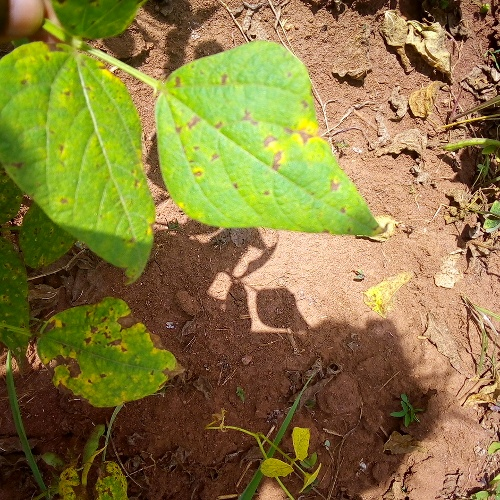

In [51]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Image

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
dataset = load_dataset("beans", split="train")
dataset[0]["image"]


In [52]:
from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0, 90))
def transforms(examples):
    examples["pixel_values"] = [rotate(image.convert("RGB")) for image in examples["image"]]
    return examples

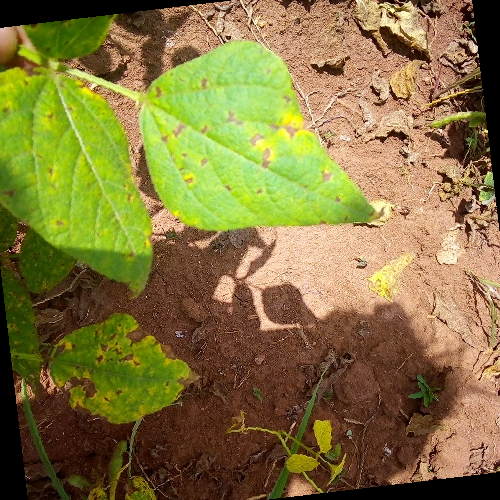

In [53]:
dataset.set_transform(transforms)
dataset[0]["pixel_values"]

# Evaluate metrics

In [54]:
from datasets import list_metrics
metrics_list = list_metrics()
len(metrics_list)
print(metrics_list)

['accuracy', 'bertscore', 'bleu', 'bleurt', 'brier_score', 'cer', 'character', 'charcut_mt', 'chrf', 'code_eval', 'comet', 'competition_math', 'coval', 'cuad', 'exact_match', 'f1', 'frugalscore', 'glue', 'google_bleu', 'indic_glue', 'mae', 'mahalanobis', 'mape', 'mase', 'matthews_correlation', 'mauve', 'mean_iou', 'meteor', 'mse', 'nist_mt', 'pearsonr', 'perplexity', 'poseval', 'precision', 'r_squared', 'recall', 'rl_reliability', 'roc_auc', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'smape', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'ter', 'trec_eval', 'wer', 'wiki_split', 'xnli', 'xtreme_s', 'AlhitawiMohammed22/CER_Hu-Evaluation-Metrics', 'BucketHeadP65/confusion_matrix', 'BucketHeadP65/roc_curve', 'DarrenChensformer/eval_keyphrase', 'DarrenChensformer/relation_extraction', 'Drunper/metrica_tesi', 'Felipehonorato/eer', 'GMFTBY/dailydialog_evaluate', 'GMFTBY/dailydialogevaluate', 'He-Xingwei/sari_metric', 'Ikala-allen/relation_extraction', 'JP-SystemsX/nDCG', 'Josh98/nl2bash_m', '

<ipython-input-54-28906c811fb1>:2: FutureWarning: list_metrics is deprecated and will be removed in the next major version of datasets. Use 'evaluate.list_evaluation_modules' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metrics_list = list_metrics()


In [58]:
from datasets import load_metric
metric = load_metric('glue', 'mrpc')
metric

Metric(name: "glue", features: {'predictions': Value(dtype='int64', id=None), 'references': Value(dtype='int64', id=None)}, usage: """
Compute GLUE evaluation metric associated to each GLUE dataset.
Args:
    predictions: list of predictions to score.
        Each translation should be tokenized into a list of tokens.
    references: list of lists of references for each translation.
        Each reference should be tokenized into a list of tokens.
Returns: depending on the GLUE subset, one or several of:
    "accuracy": Accuracy
    "f1": F1 score
    "pearson": Pearson Correlation
    "spearmanr": Spearman Correlation
    "matthews_correlation": Matthew Correlation
Examples:

    >>> glue_metric = datasets.load_metric('glue', 'sst2')  # 'sst2' or any of ["mnli", "mnli_mismatched", "mnli_matched", "qnli", "rte", "wnli", "hans"]
    >>> references = [0, 1]
    >>> predictions = [0, 1]
    >>> results = glue_metric.compute(predictions=predictions, references=references)
    >>> print(res

# Dataset from..

In [59]:
from datasets import Dataset
def gen():
    yield {"pokemon": "bulbasaur", "type": "grass"}
    yield {"pokemon": "squirtle", "type": "water"}
ds = Dataset.from_generator(gen)
ds[0]

Generating train split: 0 examples [00:00, ? examples/s]

{'pokemon': 'bulbasaur', 'type': 'grass'}

In [62]:
from datasets import IterableDataset
ds = IterableDataset.from_generator(gen)
for example in ds:
    print(example)

{'pokemon': 'bulbasaur', 'type': 'grass'}
{'pokemon': 'squirtle', 'type': 'water'}


In [63]:
from datasets import Dataset
ds = Dataset.from_dict({"pokemon": ["bulbasaur", "squirtle"], "type": ["grass", "water"]})
ds[0]

{'pokemon': 'bulbasaur', 'type': 'grass'}

# Share Dataset to the Hub

In [64]:
# !pip install huggingface_hub

In [65]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

In [66]:
from datasets import load_dataset

dataset = load_dataset("stevhliu/demo")
dataset.push_to_hub("naninya/processed_demo")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

# General Usage

## config

In [74]:
from datasets import get_dataset_config_names

configs = get_dataset_config_names("naninya/processed_demo")
print(configs)

['default']


## load

In [70]:
from datasets import load_dataset
dataset = load_dataset("naninya/processed_demo")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5 [00:00<?, ? examples/s]

## Load by datafiles

In [82]:
dataset = load_dataset(
  "naninya/processed_demo",
  revision="main",  # tag name, or branch name, or commit hash
  data_files={
      "train":"data/train-00000-of-00001.parquet",
      "test":"data/test-00000-of-00001.parquet"
      }
)

dataset

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
        num_rows: 5
    })
    test: Dataset({
        features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
        num_rows: 5
    })
})

## Load by url

In [89]:
base_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/"
dataset = load_dataset("json", data_files={"train": base_url + "train-v1.1.json", "validation": base_url + "dev-v1.1.json"}, field="data")
dataset

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    validation: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

In [91]:
base_url = "https://storage.googleapis.com/huggingface-nlp/cache/datasets/wikipedia/20200501.en/1.0.0/"
data_files = {"train": base_url + "wikipedia-train.arrow"}
wiki = load_dataset("arrow", data_files=data_files, split="train")

KeyboardInterrupt: ignored

## from~

In [ ]:
from datasets import Dataset
dataset = Dataset.from_file("data.arrow")

dataset = Dataset.from_sql("data_table_name", con="sqlite:///sqlite_file.db")
dataset = Dataset.from_sql("SELECT text FROM table WHERE length(text) > 100 LIMIT 10", con="sqlite:///sqlite_file.db")


## multiprorcessing

In [ ]:
from datasets import load_dataset

oscar_afrikaans = load_dataset("oscar-corpus/OSCAR-2201", "af", num_proc=8)
imagenet = load_dataset("imagenet-1k", num_proc=8)
ml_librispeech_spanish = load_dataset("facebook/multilingual_librispeech", "spanish", num_proc=8)

# Load in memory data

## from dict

In [93]:
from datasets import Dataset
my_dict = {"a": [1, 2, 3]}
dataset = Dataset.from_dict(my_dict)
dataset

Dataset({
    features: ['a'],
    num_rows: 3
})

## from list

In [94]:
from datasets import Dataset
my_list = [{"a": 1}, {"a": 2}, {"a": 3}]
dataset = Dataset.from_list(my_list)
dataset

Dataset({
    features: ['a'],
    num_rows: 3
})

## from generator

In [96]:
from datasets import Dataset
def my_gen():
    for i in range(1, 4):
        yield {"a": i}
dataset = Dataset.from_generator(my_gen)
dataset

Dataset({
    features: ['a'],
    num_rows: 3
})

## iterable dataset from generator by files

In [99]:
def gen(shards):
    for shard in shards:
        with open(shard) as f:
            for line in f:
                yield {"line": line}
shards = [f"data{i}.txt" for i in range(32)]
ds = IterableDataset.from_generator(gen, gen_kwargs={"shards": shards})
ds = ds.shuffle(seed=42, buffer_size=10_000)  # shuffles the shards order + uses a shuffle buffer
from torch.utils.data import DataLoader
dataloader = DataLoader(ds.with_format("torch"), num_workers=4)  # give each worker a subset of 32/4=8 shards
dataloader

## from pandas

In [107]:
from datasets import Dataset
import pandas as pd
df = pd.DataFrame({"a": [1, 2, 3]})
dataset = Dataset.from_pandas(df)

In [112]:
train_test_ds = load_dataset("naninya/processed_demo", split="train+test")
train_test_ds

Dataset({
    features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
    num_rows: 10
})

In [115]:
train_10_20_ds = load_dataset("naninya/processed_demo", split="train[1:3]")
train_10_20_ds

Dataset({
    features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
    num_rows: 2
})

In [117]:
train_10pct_ds = load_dataset("naninya/processed_demo", split="train[:10%]")
train_10pct_ds

Dataset({
    features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
    num_rows: 0
})

In [119]:
train_10_80pct_ds = load_dataset("naninya/processed_demo", split="train[:10%]+test[-80%:]")
train_10_80pct_ds

Dataset({
    features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
    num_rows: 4
})

# Metrics

In [123]:
# from datasets import load_metric
# metric = load_metric('PATH/TO/MY/METRIC/SCRIPT')

# # Example of typical usage
# for batch in dataset:
#     inputs, references = batch
#     predictions = model(inputs)
#     metric.add_batch(predictions=predictions, references=references)
# score = metric.compute()

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [126]:
! pip install git+https://github.com/google-research/bleurt.git

  Cloning https://github.com/google-research/bleurt.git to /tmp/pip-req-build-x3kjjklm
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/bleurt.git /tmp/pip-req-build-x3kjjklm
  Resolved https://github.com/google-research/bleurt.git to commit cebe7e6f996b40910cfaa520a63db47807e3bf5c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.9 MB/s eta 0:00:00
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456765 sha256=dfe1f33b0cc6fafab719967aff6378582169cdad4206f3adbf2edf672d804710
  Stored in directory: /tmp/pip-ephem-wheel-cache-r9vjhu_r/wheels/64/f4/2c/509a6c31b8ebde891a81029fd94f199b1b92f0e7cfc20d417a
Successfully built BLEURT


In [ ]:
from datasets import load_metric
metric = load_metric('bleurt', name='bleurt-base-128')
# metric = load_metric('bleurt', name='bleurt-base-512')

In [ ]:
from datasets import load_metric
metric = load_metric('glue', 'mrpc', num_process=8, process_id=7)
metric

In [ ]:
from datasets import load_metric
metric = load_metric('glue', 'mrpc', num_process=8, process_id=7, experiment_id="My_experiment_10")
metric

# Process

In [157]:
from datasets import load_dataset
dataset = load_dataset("glue", "mrpc", split="train")

## sort

In [136]:
print(dataset["label"][:10])
print(dataset.sort("label"))
print(dataset.sort("label")["label"][:10])

[1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 3668
})
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## shuffle

In [138]:
shuffled_dataset = dataset.shuffle(seed=42)
shuffled_dataset["label"][:10]

[0, 0, 1, 0, 0, 1, 0, 1, 1, 0]

## shuffle from iterable
: faster than shuffle because no index

In [140]:
iterable_dataset = dataset.to_iterable_dataset(num_shards=128)
shuffled_iterable_dataset = iterable_dataset.shuffle(seed=42, buffer_size=1000)
shuffled_iterable_dataset

In [142]:
for a in shuffled_iterable_dataset:
    break
a

{'sentence1': 'The Federal Open Market Committee meeting gets under way on Tuesday with a monetary policy decision due on Wednesday .',
 'sentence2': 'The Federal Open Market Committee will end its two-day policy-setting meeting and announce its decision on Wednesday .',
 'label': 1,
 'idx': 3172}

## select

In [143]:
small_dataset = dataset.select([0, 10, 20, 30, 40, 50])
len(small_dataset)

6

## select and filter

In [144]:
start_with_ar = dataset.filter(lambda example: example["sentence1"].startswith("Ar"))
len(start_with_ar)
start_with_ar["sentence1"]

Filter:   0%|          | 0/3668 [00:00<?, ? examples/s]

['Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
 'Arison said Mann may have been one of the pioneers of the world music movement and he had a deep love of Brazilian music .',
 'Arts helped coach the youth on an eighth-grade football team at Lombardi Middle School in Green Bay .',
 'Around 9 : 00 a.m. EDT ( 1300 GMT ) , the euro was at $ 1.1566 against the dollar , up 0.07 percent on the day .',
 "Arguing that the case was an isolated example , Canada has threatened a trade backlash if Tokyo 's ban is not justified on scientific grounds .",
 'Artists are worried the plan would harm those who need help most - performers who have a difficult time lining up shows .']

In [147]:
even_dataset = dataset.filter(lambda example, idx: idx % 2 == 0, with_indices=True)
print(len(even_dataset))
print(len(dataset) / 2)

1834
1834.0


## split

In [152]:
dataset.train_test_split(test_size=0.1)

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3301
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 367
    })
})

In [153]:
dataset.shard(num_shards=4, index=0)

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 917
})

## rename

In [160]:
dataset.rename_column("sentence1", "sentenceA")

Dataset({
    features: ['sentenceA', 'sentence2', 'label', 'idx'],
    num_rows: 3668
})

## remove

In [161]:
dataset.remove_columns(["sentence1", "sentence2"])

Dataset({
    features: ['label', 'idx'],
    num_rows: 3668
})

## Select columns

In [162]:
dataset.select_columns(['sentence1', 'sentence2', 'idx'])

Dataset({
    features: ['sentence1', 'sentence2', 'idx'],
    num_rows: 3668
})

In [163]:
dataset.select_columns('idx')

Dataset({
    features: ['idx'],
    num_rows: 3668
})

## cast

In [165]:
from datasets import ClassLabel, Value
new_features = dataset.features.copy()
new_features["label"] = ClassLabel(names=["negative", "positive"])
new_features["idx"] = Value("int64")
dataset.cast(new_features).features


Casting the dataset:   0%|          | 0/3668 [00:00<?, ? examples/s]

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int64', id=None)}

## flatten

In [166]:
dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [216]:
from datasets import load_dataset
dataset = load_dataset("squad")

In [217]:
flat_dataset = dataset.flatten()
flat_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers.text', 'answers.answer_start'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers.text', 'answers.answer_start'],
        num_rows: 10570
    })
})

## map

In [174]:
dataset = load_dataset("glue", "mrpc", split="train")

small_dataset = dataset.filter(lambda x,idx: idx % 1000==0, with_indices=True)
small_dataset

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 4
})

In [177]:
def func(example):
    example["sentence1"] = "prefix A" + example["sentence1"]
    return example
small_dataset.map(func)[0]

{'sentence1': 'prefix AAmrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [179]:
small_dataset.map(lambda example: {"new_sentence": "new" + example["sentence1"]}, remove_columns=["sentence1"])[0]

{'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0,
 'new_sentence': 'newAmrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .'}

## multiprocessing

In [187]:
# # when use below
# # RuntimeError: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method.

# from multiprocess import set_start_method
# import torch
# import os
# # set_start_method("spawn")
# def gpu_computation(example, rank):
#     os.environ["CUDA_VISIBLE_DEVICES"] = str(rank % torch.cuda.device_count())
#     # Your big GPU call goes here
#     return example
# updated_dataset = dataset.map(gpu_computation, with_rank=True)

In [193]:
%time updated_dataset = dataset.map(lambda example, idx: {"sentence2": f"{idx}: " + example["sentence2"]}, with_indices=True)
%time updated_dataset = dataset.map(lambda example, idx: {"sentence2": f"{idx}: " + example["sentence2"]}, num_proc=4, with_indices=True)

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

CPU times: user 357 ms, sys: 4.64 ms, total: 362 ms
Wall time: 380 ms
CPU times: user 21.1 ms, sys: 0 ns, total: 21.1 ms
Wall time: 21.4 ms


## map: chunk

In [194]:
def chunk_examples(examples):
    chunks = []
    for sentence in examples["sentence1"]:
        chunks += [sentence[i:i + 50] for i in range(0, len(sentence), 50)]
    return {"chunks": chunks}

In [195]:
chunked_dataset = dataset.map(chunk_examples, batched=True, remove_columns=dataset.column_names)
chunked_dataset[:10]

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

{'chunks': ['Amrozi accused his brother , whom he called " the ',
  'witness " , of deliberately distorting his evidenc',
  'e .',
  "Yucaipa owned Dominick 's before selling the chain",
  ' to Safeway in 1998 for $ 2.5 billion .',
  'They had published an advertisement on the Interne',
  't on June 10 , offering the cargo for sale , he ad',
  'ded .',
  'Around 0335 GMT , Tab shares were up 19 cents , or',
  ' 4.4 % , at A $ 4.56 , having earlier set a record']}

## map : augmentation

In [222]:
from random import randint
from transformers import pipeline

fillmask = pipeline("fill-mask", model="roberta-base")
mask_token = fillmask.tokenizer.mask_token
smaller_dataset = dataset.filter(lambda e, i: i<100, with_indices=True)

Filter:   0%|          | 0/87599 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [200]:
def augment_data(examples):
    outputs = []
    for sentence in examples["sentence1"]:
        words = sentence.split(' ')
        K = randint(1, len(words)-1)
        masked_sentence = " ".join(words[:K]  + [mask_token] + words[K+1:])
        predictions = fillmask(masked_sentence)
        augmented_sequences = [predictions[i]["sequence"] for i in range(3)]
        outputs += [sentence] + augmented_sequences
    return {"data": outputs}

In [208]:
augmented_dataset = smaller_dataset.map(augment_data, batched=True, remove_columns=dataset.column_names, batch_size=8)
augmented_dataset[:9]["data"]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

['Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'Amrozi accused his brother, whom he called " the witness ", of deliberately distorting his evidence.',
 'Amrozi accused his brother, whom he called " the witness ", for deliberately distorting his evidence.',
 'Amrozi accused his brother, whom he called " the witness ",of deliberately distorting his evidence.',
 "Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion .",
 "Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $1 billion.",
 "Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2 billion.",
 "Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $3 billion.",
 'They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added .']

## map: tokenize

In [225]:
encoded_dataset = smaller_dataset.map(lambda examples: tokenizer(examples["context"]), batched=True)
encoded_dataset["train"][0]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]},
 'input_ids': [101,
  6549,
  2135,
  1010,
  1996

## distributed

In [226]:
from datasets import Dataset
import torch.distributed

dataset1 = Dataset.from_dict({"a": [0, 1, 2]})

if training_args.local_rank > 0:
    print("Waiting for main process to perform the mapping")
    torch.distributed.barrier()

dataset2 = dataset1.map(lambda x: {"a": x["a"] + 1})

if training_args.local_rank == 0:
    print("Loading results from main process")
    torch.distributed.barrier()

NameError: ignored

## concatenate

In [231]:
from datasets import concatenate_datasets, load_dataset

dataset1 = load_dataset("naninya/processed_demo", split="train")
dataset2 = load_dataset("naninya/processed_demo", split="train")
dataset1 = dataset1.remove_columns([col for col in dataset1.column_names if col != "review"])
dataset2 = dataset2.remove_columns([col for col in dataset2.column_names if col != "review"])

assert dataset1.features.type == dataset2.features.type
dataset = concatenate_datasets([dataset1, dataset2])
dataset

Dataset({
    features: ['review'],
    num_rows: 10
})

In [232]:
from datasets import Dataset
dataset_ids = Dataset.from_dict({"ids": list(range(len(dataset)))})
dataset_with_ids = concatenate_datasets([dataset, dataset_ids], axis=1)
dataset_with_ids

Dataset({
    features: ['review', 'ids'],
    num_rows: 10
})

## insterleave

In [244]:
from datasets import interleave_datasets
seed = 42
probabilities = [0.1, 0.7, 0.2]
d1 = Dataset.from_dict({"a": [0, 1, 2]})
d2 = Dataset.from_dict({"a": [10, 11, 12, 13]})
d3 = Dataset.from_dict({"a": [20, 21, 22]})
dataset = interleave_datasets([d1, d2, d3], probabilities=probabilities, seed=seed)
dataset["a"]

[10, 11, 20, 0, 12, 21, 13]

In [242]:
d1 = Dataset.from_dict({"a": [0, 1, 2]})
d2 = Dataset.from_dict({"a": [10, 11, 12, 13]})
d3 = Dataset.from_dict({"a": [20, 21, 22]})
dataset = interleave_datasets([d1, d2, d3], stopping_strategy="all_exhausted")
dataset["a"]

[0, 10, 20, 1, 11, 21, 2, 12, 22, 0, 13, 20]

In [246]:
dataset

Dataset({
    features: ['a'],
    num_rows: 7
})

## set format

In [247]:
import torch
dataset.set_format(type="torch", columns=["a"])

## with format

In [248]:
dataset = dataset.with_format(type="torch", columns=["a"])

In [249]:
print(dataset.format)
dataset.reset_format()
print(dataset.format)

{'type': 'torch', 'format_kwargs': {}, 'columns': ['a'], 'output_all_columns': False}
{'type': None, 'format_kwargs': {}, 'columns': ['a'], 'output_all_columns': False}


In [255]:
dataset = load_dataset("naninya/processed_demo", split="train")
print(dataset.format)
def encode(batch):
    return tokenizer(batch["review"], padding="longest", truncation=True, max_length=512, return_tensors="pt")
dataset.set_transform(encode)
print(dataset.format)

{'type': None, 'format_kwargs': {}, 'columns': ['id', 'package_name', 'review', 'date', 'star', 'version_id'], 'output_all_columns': False}
{'type': 'custom', 'format_kwargs': {'transform': <function encode at 0x7908f8613250>}, 'columns': ['id', 'package_name', 'review', 'date', 'star', 'version_id'], 'output_all_columns': False}


## Save functions

CSV	Dataset.to_csv()  
JSON	Dataset.to_json()  
Parquet	Dataset.to_parquet()  
SQL	Dataset.to_sql()  
In-memory Python object	Dataset.to_pandas() or Dataset.to_dict()

# Stream

## load

In [258]:
from datasets import load_dataset
dataset = load_dataset('naninya/processed_demo', 'default', split='train', streaming=True)
print(next(iter(dataset)))

{'id': '7bd227d9-afc9-11e6-aba1-c4b301cdf627', 'package_name': 'com.mantz_it.rfanalyzer', 'review': "Great app! The new version now works on my Bravia Android TV which is great as it's right by my rooftop aerial cable. The scan feature would be useful...any ETA on when this will be available? Also the option to import a list of bookmarks e.g. from a simple properties file would be useful.", 'date': 'October 12 2016', 'star': 4, 'version_id': 1487}


In [266]:
from datasets import load_dataset

# if local file, load_dataset/to_iterable is faster
%time dataset = load_dataset("naninya/processed_demo", split="train")
%time iterable_dataset = dataset.to_iterable_dataset()

%time iterable_dataset = load_dataset("naninya/processed_demo", streaming=True)

CPU times: user 524 ms, sys: 5.28 ms, total: 529 ms
Wall time: 1.8 s
CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 1.04 ms
CPU times: user 516 ms, sys: 3.92 ms, total: 520 ms
Wall time: 1.75 s


## shuffle

In [274]:
# import torch
# from datasets import load_dataset

# dataset = load_dataset("food101")
# iterable_dataset = dataset.to_iterable_dataset(num_shards=64) # shard the dataset
# iterable_dataset = iterable_dataset.shuffle(buffer_size=10_000)  # shuffles the shards order and use a shuffle buffer when you start iterating

In [280]:
# import torch
# from datasets import load_dataset

# dataset = load_dataset("food101", split="train", streaming=True)
# dataset = dataset.shuffle(buffer_size=10_000)  # shuffles the shards order and use a shuffle buffer when you start iterating
# list(dataset["train"].take(2))

## take

In [282]:
dataset = load_dataset('oscar', "unshuffled_deduplicated_en", split='train', streaming=True)
dataset_head = dataset.take(2)
list(dataset_head)

[{'id': 0,
  'text': 'Mtendere Village was inspired by the vision of Chief Napoleon Dzombe, which he shared with John Blanchard during his first visit to Malawi. Chief Napoleon conveyed the desperate need for a program to intervene and care for the orphans and vulnerable children (OVC) in Malawi, and John committed to help.\nEstablished in honor of John & Lindy’s son, Christopher Blanchard, this particular program is very dear to the Blanchard family. Dana Blanchard, or Mama Dana as she is more commonly referred to at Mtendere, lived on site during the initial development, and she returns each summer to spend the season with her Malawian family. The heart of the program is to be His hands and feet by caring for the children at Mtendere, and meeting their spiritual, physical, academic, and emotional needs.\nMtendere Village is home to 134 children, living in 16 homes with a housemother and several brothers and sisters. This family environment is one that many of the children have never 

## skip

In [283]:
dataset.skip(1000)

## interleave

In [284]:
from datasets import interleave_datasets
en_dataset = load_dataset('oscar', "unshuffled_deduplicated_en", split='train', streaming=True)
fr_dataset = load_dataset('oscar', "unshuffled_deduplicated_fr", split='train', streaming=True)

multilingual_dataset = interleave_datasets([en_dataset, fr_dataset])
list(multilingual_dataset.take(2))

[{'id': 0,
  'text': 'Mtendere Village was inspired by the vision of Chief Napoleon Dzombe, which he shared with John Blanchard during his first visit to Malawi. Chief Napoleon conveyed the desperate need for a program to intervene and care for the orphans and vulnerable children (OVC) in Malawi, and John committed to help.\nEstablished in honor of John & Lindy’s son, Christopher Blanchard, this particular program is very dear to the Blanchard family. Dana Blanchard, or Mama Dana as she is more commonly referred to at Mtendere, lived on site during the initial development, and she returns each summer to spend the season with her Malawian family. The heart of the program is to be His hands and feet by caring for the children at Mtendere, and meeting their spiritual, physical, academic, and emotional needs.\nMtendere Village is home to 134 children, living in 16 homes with a housemother and several brothers and sisters. This family environment is one that many of the children have never 

In [285]:
multilingual_dataset_with_oversampling = interleave_datasets([en_dataset, fr_dataset], probabilities=[0.8, 0.2], seed=42)
list(multilingual_dataset_with_oversampling.take(2))

[{'id': 0,
  'text': 'Mtendere Village was inspired by the vision of Chief Napoleon Dzombe, which he shared with John Blanchard during his first visit to Malawi. Chief Napoleon conveyed the desperate need for a program to intervene and care for the orphans and vulnerable children (OVC) in Malawi, and John committed to help.\nEstablished in honor of John & Lindy’s son, Christopher Blanchard, this particular program is very dear to the Blanchard family. Dana Blanchard, or Mama Dana as she is more commonly referred to at Mtendere, lived on site during the initial development, and she returns each summer to spend the season with her Malawian family. The heart of the program is to be His hands and feet by caring for the children at Mtendere, and meeting their spiritual, physical, academic, and emotional needs.\nMtendere Village is home to 134 children, living in 16 homes with a housemother and several brothers and sisters. This family environment is one that many of the children have never 

## rename

In [286]:
from datasets import load_dataset
dataset = load_dataset('mc4', 'en', streaming=True, split='train')
dataset = dataset.rename_column("text", "content")

## remove

In [287]:
from datasets import load_dataset
dataset = load_dataset('mc4', 'en', streaming=True, split='train')
dataset = dataset.remove_columns('timestamp')

## cast

In [288]:
from datasets import load_dataset
dataset = load_dataset('glue', 'mrpc', split='train', streaming=True)
dataset.features

from datasets import ClassLabel, Value
new_features = dataset.features.copy()
new_features["label"] = ClassLabel(names=['negative', 'positive'])
new_features["idx"] = Value('int64')
dataset = dataset.cast(new_features)
dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int64', id=None)}

## map

In [289]:
def add_prefix(example):
    example['text'] = 'My text: ' + example['text']
    return example

In [290]:
from datasets import load_dataset
dataset = load_dataset('oscar', 'unshuffled_deduplicated_en', streaming=True, split='train')
updated_dataset = dataset.map(add_prefix)
list(updated_dataset.take(3))

[{'id': 0,
  'text': 'My text: Mtendere Village was inspired by the vision of Chief Napoleon Dzombe, which he shared with John Blanchard during his first visit to Malawi. Chief Napoleon conveyed the desperate need for a program to intervene and care for the orphans and vulnerable children (OVC) in Malawi, and John committed to help.\nEstablished in honor of John & Lindy’s son, Christopher Blanchard, this particular program is very dear to the Blanchard family. Dana Blanchard, or Mama Dana as she is more commonly referred to at Mtendere, lived on site during the initial development, and she returns each summer to spend the season with her Malawian family. The heart of the program is to be His hands and feet by caring for the children at Mtendere, and meeting their spiritual, physical, academic, and emotional needs.\nMtendere Village is home to 134 children, living in 16 homes with a housemother and several brothers and sisters. This family environment is one that many of the children ha

In [291]:
updated_dataset = dataset.map(add_prefix, remove_columns=["id"])
list(updated_dataset.take(3))

[{'text': 'My text: Mtendere Village was inspired by the vision of Chief Napoleon Dzombe, which he shared with John Blanchard during his first visit to Malawi. Chief Napoleon conveyed the desperate need for a program to intervene and care for the orphans and vulnerable children (OVC) in Malawi, and John committed to help.\nEstablished in honor of John & Lindy’s son, Christopher Blanchard, this particular program is very dear to the Blanchard family. Dana Blanchard, or Mama Dana as she is more commonly referred to at Mtendere, lived on site during the initial development, and she returns each summer to spend the season with her Malawian family. The heart of the program is to be His hands and feet by caring for the children at Mtendere, and meeting their spiritual, physical, academic, and emotional needs.\nMtendere Village is home to 134 children, living in 16 homes with a housemother and several brothers and sisters. This family environment is one that many of the children have never pr

## batch process

In [292]:
from datasets import load_dataset
from transformers import AutoTokenizer
dataset = load_dataset("mc4", "en", streaming=True, split="train")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
def encode(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length')
dataset = dataset.map(encode, batched=True, remove_columns=["text", "timestamp", "url"])
next(iter(dataset))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101,
  8466,
  1018,
  1010,
  4029,
  2475,
  2062,
  18558,
  3100,
  2061,
  2000,
  2216,
  1997,
  2017,
  2008,
  2020,
  2200,
  14044,
  2023,
  2003,
  2025,
  2000,
  2017,
  2021,
  2005,
  2216,
  1997,
  2017,
  2008,
  4756,
  2043,
  1045,
  3198,
  2055,
  2821,
  5244,
  2030,
  2373,
  2075,
  1048,
  5332,
  16068,
  1005,
  1055,
  2023,
  2003,
  2000,
  2017,
  1012,
  2065,
  2017,
  2113,
  1037,
  2338,
  1010,
  4037,
  1010,
  2030,
  2619,
  2000,
  2831,
  2000,
  2000,
  2131,
  2062,
  18558,
  2008,
  1045,
  6148,
  2061,
  1045,
  2113,
  2054,
  2070,
  1997,
  2017,
  2024,
  3331,
  2055,
  3531,
  3745,
  2009,
  2007,
  2033,
  1012,
  1045,
  3198,
  3980,
  2000,
  5114,
  2062,
  18558,
  2006,
  5746,
  2008,
  2015,
  2035,
  1012,
  2025,
  2000,
  2131,
  4191,
  2012,
  2043,
  4851,
  2009,
  1012,
  2061,
  2065,
  3087,
  2038,
  2151,
  2204,
  18558,
  2027,
  2052,
  2066,
  2000,
  3745,
  2007,
  2033,
  3531,
  2079

## filter

In [412]:
from datasets import load_dataset
dataset = load_dataset('oscar', 'unshuffled_deduplicated_en', streaming=True, split='train')
start_with_ar = dataset.filter(lambda example: example['text'].startswith('Ar'))
next(iter(start_with_ar))

{'id': 4,
 'text': 'Are you looking for Number the Stars (Essential Modern Classics)? Normally, this book cost you INR 399.00. At 1234-38.com you can get the PDF version of Number the Stars (Essential Modern Classics) for FREE. Just click on links below to download the PDF file. You can also use the search function above to get another books by author Lois Lowry.'}

## stream in training loops

In [101]:
from datasets import load_dataset
dataset = load_dataset('naninya/processed_demo', streaming=True, split="train")

In [93]:
# filtered_dataset = dataset.filter(lambda x,idx: idx % 10000==0, with_indices=True)

In [103]:
seed, buffer_size = 42, 10_000
dataset = dataset.shuffle(seed, buffer_size=buffer_size)

In [107]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [108]:
def tokenize_function(examples):
    result = tokenizer(examples["review"])
    # if tokenizer.is_fast:
    #     result["word_ids"] = [result.word_ids(i) for i in range(len(result["input_ids"]))]
    return result


# Use batched=True to activate fast multithreading!
dataset = dataset.map(
    tokenize_function, batched=True, remove_columns=dataset.column_names
)
dataset

In [109]:
dataset

In [110]:
chunk_size = 128
def group_texts(examples):
    # Concatenate all texts
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    # Compute length of concatenated texts
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the last chunk if it's smaller than chunk_size
    total_length = (total_length // chunk_size) * chunk_size
    # Split by chunks of max_len
    result = {
        k: [t[i : i + chunk_size] for i in range(0, total_length, chunk_size)]
        for k, t in concatenated_examples.items()
    }
    # Create a new labels column
    result["labels"] = result["input_ids"].copy()
    return result
dataset = dataset.map(group_texts, batched=True)
dataset

In [117]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForMaskedLM, DataCollatorForLanguageModeling
from tqdm import tqdm
dataset = dataset.with_format("torch")
dataloader = DataLoader(dataset, collate_fn=DataCollatorForLanguageModeling(tokenizer))
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")
model.train().to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)
for epoch in tqdm(range(1000)):
    dataset.set_epoch(epoch)
    for i, batch in enumerate(dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % 100 == 0:
        print(f"loss: {loss}")


  0%|          | 2/1000 [00:00<04:01,  4.14it/s]

loss: 5.879612445831299



 10%|█         | 102/1000 [00:15<02:12,  6.76it/s]

loss: 1.067941665649414



 20%|██        | 202/1000 [00:30<01:59,  6.68it/s]

loss: 0.49873584508895874



 30%|███       | 302/1000 [00:45<01:49,  6.37it/s]

loss: 0.38512349128723145



 40%|████      | 402/1000 [01:00<01:31,  6.55it/s]

loss: 0.1396026611328125



 50%|█████     | 502/1000 [01:15<01:15,  6.60it/s]

loss: 0.22224846482276917



 60%|██████    | 602/1000 [01:30<01:02,  6.39it/s]

loss: 0.029410218819975853



 70%|███████   | 702/1000 [01:45<00:43,  6.81it/s]

loss: 0.07089371979236603



 80%|████████  | 802/1000 [01:59<00:29,  6.61it/s]

loss: 0.012467018328607082



 90%|█████████ | 902/1000 [02:14<00:14,  6.68it/s]

loss: 0.006658854428678751



100%|██████████| 1000/1000 [02:30<00:00,  6.66it/s]


In [118]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")
# model.eval().to(device)
# for i, batch in enumerate(tqdm(dataloader, total=5)):
#     batch = {k: v.to(device) for k, v in batch.items()}
#     break

# outputs = model(**batch)
for i, o in zip(
    outputs.logits.argmax(axis=2).flatten(),
    batch["labels"].flatten()
):
    if o != -100:
        print(f"output:{tokenizer.decode(i)}, label:{tokenizer.decode(o)}")


output:around, label:around
output:##rf, label:##rf
output:my, label:my
output:-, label:-
output:##er, label:##er
output:maximum, label:maximum
output:., label:.
output:to, label:to
output:bandwidth, label:bandwidth
output:one, label:one
output:the, label:the
output:the, label:the
output:it, label:it
output:not, label:not
output:possible, label:possible
output:increase, label:increase
output:is, label:is
output:the, label:the
output:!, label:!
output:now, label:now


# Caching

In [46]:
!export HF_DATASETS_CACHE="./cache"

In [57]:
from datasets import load_dataset
dataset = load_dataset('naninya/processed_demo', cache_dir="./cache")

In [52]:
from datasets import load_dataset
dataset = load_dataset('naninya/processed_demo', download_mode='force_redownload')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5 [00:00<?, ? examples/s]

In [58]:
dataset.cleanup_cache_files()

{'train': 0, 'test': 0}

In [61]:
dataset["train"]

Dataset({
    features: ['id', 'package_name', 'review', 'date', 'star', 'version_id'],
    num_rows: 5
})

In [63]:
updated_dataset = dataset.map(lambda example:{"prefixed":"PREFIX"+example["review"]}, load_from_cache_file=False)

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

In [66]:
updated_dataset["train"]["prefixed"]

["PREFIXGreat app! The new version now works on my Bravia Android TV which is great as it's right by my rooftop aerial cable. The scan feature would be useful...any ETA on when this will be available? Also the option to import a list of bookmarks e.g. from a simple properties file would be useful.",
 "PREFIXGreat It's not fully optimised and has some issues with crashing but still a nice app  especially considering the price and it's open source.",
 "PREFIXWorks on a Nexus 6p I'm still messing around with my hackrf but it works with my Nexus 6p  Trond usb-c to usb host adapter. Thanks!",
 'PREFIXThe bandwidth seemed to be limited to maximum 2 MHz or so. I tried to increase the bandwidth but not possible. I purchased this is because one of the pictures in the advertisement showed the 2.4GHz band with around 10MHz or more bandwidth. Is it not possible to increase the bandwidth? If not  it is just the same performance as other free APPs.',
 'PREFIXWorks well with my Hackrf Hopefully new u

# Faiss

In [5]:
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 18.4 MB/s eta 0:00:00


In [1]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
import torch
torch.set_grad_enabled(False)
ctx_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.weight', 'ctx_encoder.bert_model.pooler.dense.bias']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [2]:
from datasets import load_dataset
ds = load_dataset('crime_and_punish', split='train[:100]')
ds_with_embeddings = ds.map(lambda example: {'embeddings': ctx_encoder(**ctx_tokenizer(example["line"], return_tensors="pt"))[0][0].numpy()})

In [3]:
ds_with_embeddings.add_faiss_index(column='embeddings')

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['line', 'embeddings'],
    num_rows: 100
})

In [8]:
ds_with_embeddings["embeddings"][0]

0.19912856817245483

In [9]:
question = "Is it serious ?"
question_embedding = ctx_encoder(**ctx_tokenizer(question, return_tensors="pt"))[0][0].numpy()
scores, retrieved_examples = ds_with_embeddings.get_nearest_examples('embeddings', question_embedding, k=10)
retrieved_examples["line"][0]

'“I knew it,” he muttered in confusion, “I thought so! That’s the worst\r\n'

In [11]:
faiss_index = ds_with_embeddings.get_index('embeddings').faiss_index
limits, distances, indices = faiss_index.range_search(x=question_embedding.reshape(1, -1), thresh=0.95)

In [15]:
ds_with_embeddings.save_faiss_index('embeddings', 'my_index.faiss')

In [17]:
ds = load_dataset('crime_and_punish', split='train[:100]')
ds.load_faiss_index('embeddings', 'my_index.faiss')

# Elastic search

In [20]:
!pip install elasticsearch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.8/412.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 6.4 MB/s eta 0:00:00


In [1]:
from datasets import load_dataset
squad = load_dataset('squad', split='validation')

In [5]:
squad.add_elasticsearch_index("context", host="localhost", port="9200")
query = "machine"
scores, retrieved_examples = squad.get_nearest_examples("context", query, k=10)
retrieved_examples["title"][0]

TypeError: ignored

In [3]:
from datasets import load_dataset
squad = load_dataset('squad', split='validation')
squad.add_elasticsearch_index("context", host="localhost", port="9200", es_index_name="hf_squad_val_context")
squad.get_index("context").es_index_name

In [ ]:
from datasets import load_dataset
squad = load_dataset('squad', split='validation')
squad.load_elasticsearch_index("context", host="localhost", port="9200", es_index_name="hf_squad_val_context")
query = "machine"
scores, retrieved_examples = squad.get_nearest_examples("context", query, k=10)

In [ ]:
import elasticsearch as es
import elasticsearch.helpers
from elasticsearch import Elasticsearch
es_client = Elasticsearch([{"host": "localhost", "port": "9200"}])  # default client
es_config = {
    "settings": {
        "number_of_shards": 1,
        "analysis": {"analyzer": {"stop_standard": {"type": "standard", " stopwords": "_english_"}}},
    },
    "mappings": {"properties": {"text": {"type": "text", "analyzer": "standard", "similarity": "BM25"}}},
}  # default config
es_index_name = "hf_squad_context"  # name of the index in Elasticsearch
squad.add_elasticsearch_index("context", es_client=es_client, es_config=es_config, es_index_name=es_index_name)

# Metric

In [8]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 2.2 MB/s eta 0:00:00


In [1]:
import datasets
metric = datasets.load_metric('sacrebleu')

<ipython-input-1-4164c0ae5239>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = datasets.load_metric('sacrebleu')


In [2]:
print(metric.inputs_description)


Produces BLEU scores along with its sufficient statistics
from a source against one or more references.

Args:
    predictions (`list` of `str`): list of translations to score. Each translation should be tokenized into a list of tokens.
    references (`list` of `list` of `str`): A list of lists of references. The contents of the first sub-list are the references for the first prediction, the contents of the second sub-list are for the second prediction, etc. Note that there must be the same number of references for each prediction (i.e. all sub-lists must be of the same length).
    smooth_method (`str`): The smoothing method to use, defaults to `'exp'`. Possible values are:
        - `'none'`: no smoothing
        - `'floor'`: increment zero counts
        - `'add-k'`: increment num/denom by k for n>1
        - `'exp'`: exponential decay
    smooth_value (`float`): The smoothing value. Only valid when `smooth_method='floor'` (in which case `smooth_value` defaults to `0.1`) or `smoot

In [8]:
predictions = ["hello there general kenobi", "on our way to ankh morpork"]
references = [["hello there general kenobi", "hello there !"],["goodbye ankh morpork", "ankh morpork"]]

results = metric.compute(predictions=predictions, references=references)
results

{'score': 39.76353643835252,
 'counts': [6, 4, 2, 1],
 'totals': [10, 8, 6, 4],
 'precisions': [60.0, 50.0, 33.333333333333336, 25.0],
 'bp': 1.0,
 'sys_len': 10,
 'ref_len': 7}

## custom

In [9]:
class Squad(datasets.Metric):
    def _info(self):
        return datasets.MetricInfo(
            description=_DESCRIPTION,
            citation=_CITATION,
            inputs_description=_KWARGS_DESCRIPTION,
            features=datasets.Features(
                {
                    "predictions": {"id": datasets.Value("string"), "prediction_text": datasets.Value("string")},
                    "references": {
                        "id": datasets.Value("string"),
                        "answers": datasets.features.Sequence(
                            {
                                "text": datasets.Value("string"),
                                "answer_start": datasets.Value("int32"),
                            }
                        ),
                    },
                }
            ),
            codebase_urls=["https://rajpurkar.github.io/SQuAD-explorer/"],
            reference_urls=["https://rajpurkar.github.io/SQuAD-explorer/"],
        )

# Beam

In [ ]:
DATASET_NAME=your_dataset_name  # ex: wikipedia
CONFIG_NAME=your_config_name    # ex: 20220301.en

In [ ]:
PROJECT=your_project
BUCKET=your_bucket
REGION=your_region

In [ ]:
echo "datasets" > /tmp/beam_requirements.txt
echo "apache_beam" >> /tmp/beam_requirements.txt

In [ ]:
datasets-cli run_beam datasets/$DATASET_NAME \
--name $CONFIG_NAME \
--save_info \
--cache_dir gs://$BUCKET/cache/datasets \
--beam_pipeline_options=\
"runner=DataflowRunner,project=$PROJECT,job_name=$DATASET_NAME-gen,"\
"staging_location=gs://$BUCKET/binaries,temp_location=gs://$BUCKET/temp,"\
"region=$REGION,requirements_file=/tmp/beam_requirements.txt"